# LLM Annotation

Code to generate the Figure 3 visualization. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the data from your table
data = {
    "Model": [
        "Arctic", "DBRX", "Gemini 1.0 Pro", "Gemini 1.5 Pro", "GPT-3.5 Turbo",
        "GPT-4 Turbo", "GPT-4o", "Llama-3.1-8B", "Llama-3.1-70B", "Llama-3.1-405B", "Mixtral-8x22B"
    ],
    "Gender": [
        "Male", "Female", "Male", "Male", "Female",
        "Male", "Male", "Female", "Female", "Female", "Female"
    ],
    "Age": [
        "18-29", "18-29", "18-29", "18-29", "18-29",
        "18-29", "18-29", "30-39", "18-29", "18-29", "30-39"
    ],
    "Income": [
        "75-100", "75-100", "<30", "<30", "75-100",
        "75-100", "<30", "75-100", "75-100", "75-100", "75-100"
    ]
}

# Create a DataFrame from the table data
df = pd.DataFrame(data)

# Map Age and Income bins to numeric values for plotting
age_order = {"18-29": 1, "30-39": 2, "40-49": 3, "50-69": 4}
income_order = {"<30": 1, "30-50": 2, "50-75": 3, "75-100": 4, "100+": 5}


df["Age (Numeric)"] = df["Age"].map(age_order)
df["Income (Numeric)"] = df["Income"].map(income_order)

In [2]:
adjustmentW = 0.3
adjustmentH = adjustmentW/2.4

# Arctic X
df.loc[0, "Income (Numeric)"] = df.loc[0, "Income (Numeric)"] + adjustmentW
df.loc[0, "Age (Numeric)"] = df.loc[0,"Age (Numeric)"] + adjustmentH

# DBRX X
df.loc[1, "Income (Numeric)"] = df.loc[1, "Income (Numeric)"] - adjustmentW
df.loc[1, "Age (Numeric)"] = df.loc[1,"Age (Numeric)"] + adjustmentH

# Gemini 1.0 Pro X
df.loc[2, "Income (Numeric)"] = df.loc[2, "Income (Numeric)"] - adjustmentW/2
df.loc[2, "Age (Numeric)"] = df.loc[2,"Age (Numeric)"] + adjustmentH/1.1

# "Gemini 1.5 Pro" X
df.loc[3, "Income (Numeric)"] = df.loc[3, "Income (Numeric)"] + adjustmentW/2
df.loc[3, "Age (Numeric)"] = df.loc[3,"Age (Numeric)"] + adjustmentH/1.1

# "GPT-3.5 Turbo" X
df.loc[4, "Income (Numeric)"] = df.loc[4, "Income (Numeric)"] 
df.loc[4, "Age (Numeric)"] = df.loc[4,"Age (Numeric)"] + adjustmentH

# "GPT-4 Turbo" x
df.loc[5, "Income (Numeric)"] = df.loc[5, "Income (Numeric)"] - adjustmentW
df.loc[5, "Age (Numeric)"] = df.loc[5,"Age (Numeric)"] - adjustmentH

# "GPT-4o"
df.loc[6, "Income (Numeric)"] = df.loc[6, "Income (Numeric)"]
df.loc[6, "Age (Numeric)"] = df.loc[6,"Age (Numeric)"] - adjustmentH/1.1

# "Llama-3.1-8B" X
df.loc[7, "Income (Numeric)"] = df.loc[7, "Income (Numeric)"] - adjustmentW/2.1
df.loc[7, "Age (Numeric)"] = df.loc[7,"Age (Numeric)"]

# "Llama-3.1-70B"
df.loc[8, "Income (Numeric)"] = df.loc[8, "Income (Numeric)"]
df.loc[8, "Age (Numeric)"] = df.loc[8,"Age (Numeric)"] - adjustmentH

"Llama-3.1-405B"
df.loc[9, "Income (Numeric)"] = df.loc[9, "Income (Numeric)"] + adjustmentW
df.loc[9, "Age (Numeric)"] = df.loc[9,"Age (Numeric)"] - adjustmentH

"Mixtral-8x22B"
df.loc[10, "Income (Numeric)"] = df.loc[10, "Income (Numeric)"] + adjustmentW/2.1
df.loc[10, "Age (Numeric)"] = df.loc[10,"Age (Numeric)"]

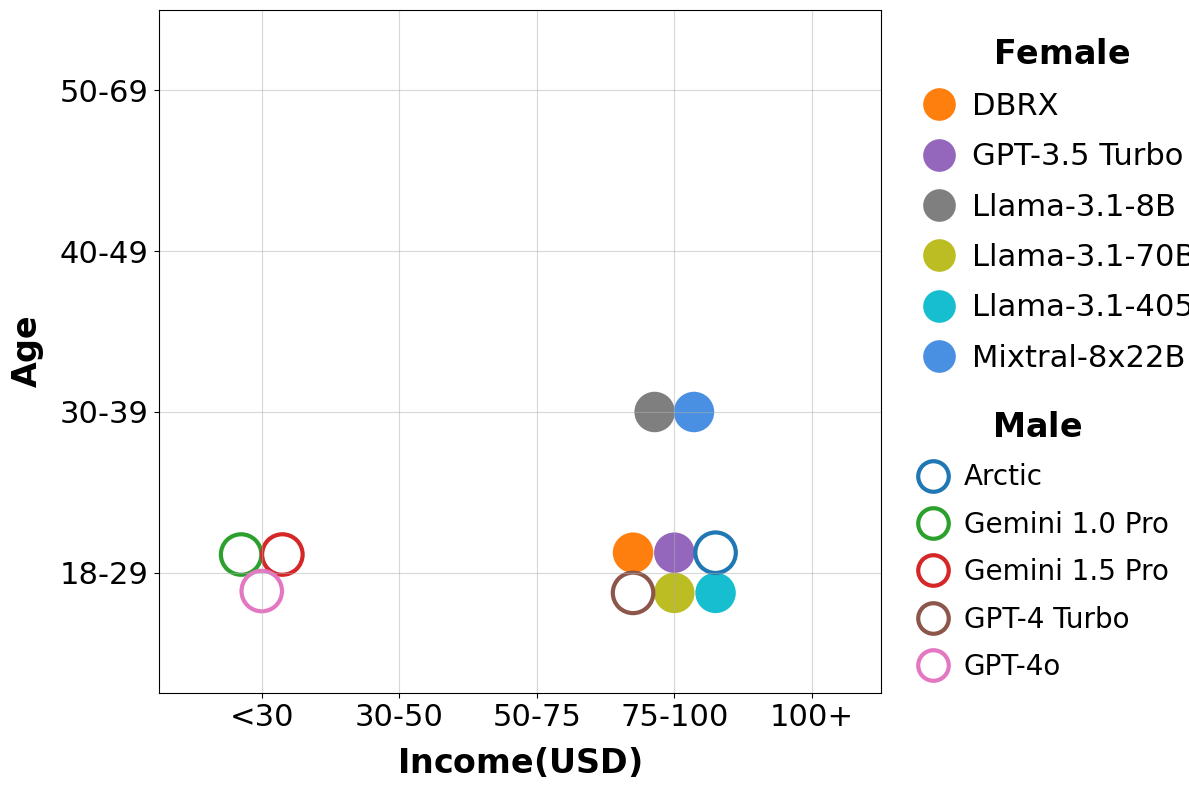

In [3]:


# Separate data by gender for customized plotting
female_models = df[df["Gender"] == "Female"]
male_models = df[df["Gender"] == "Male"]

# Set up the plot
plt.figure(figsize=(12, 8))

# Manually assign distinct colors for each model
model_colors = {
    "Arctic": "#1f77b4",
    "DBRX": "#ff7f0e",
    "Gemini 1.0 Pro": "#2ca02c",
    "Gemini 1.5 Pro": "#d62728",
    "GPT-3.5 Turbo": "#9467bd",
    "GPT-4 Turbo": "#8c564b",
    "GPT-4o": "#e377c2",
    "Llama-3.1-8B": "#7f7f7f",
    "Llama-3.1-70B": "#bcbd22",
    "Llama-3.1-405B": "#17becf",
    "Mixtral-8x22B": "#4a90e2"
}

# Plot Female models
for i, row in female_models.iterrows():
    plt.scatter(
        row["Income (Numeric)"], row["Age (Numeric)"],
        label=row["Model"],
        color=model_colors[row["Model"]],
        edgecolor='none',
        linewidth=1.5,
        s=850,
        marker="o"
    )

# Plot Male models
for i, row in male_models.iterrows():
    plt.scatter(
        row["Income (Numeric)"], row["Age (Numeric)"],
        label=row["Model"],
        color="none",
        edgecolor=model_colors[row["Model"]],
        linewidth=3,
        s=850,
        marker="o"
    )

# Customize axes
plt.xticks(ticks=list(income_order.values()), labels=list(income_order.keys()), fontsize=22)
plt.yticks(ticks=list(age_order.values()), labels=list(age_order.keys()), fontsize=22)
plt.xlabel(r"$\bf{Income (USD)}$", fontsize=24, labelpad=10)
plt.ylabel(r"$\bf{Age}$", fontsize=24, labelpad=10)

# Define y-axis limits to leave space below
y_min = min(age_order.values()) - 0.75  # Increased space at the bottom
y_max = max(age_order.values()) + 0.5

# Define x-axis limits to leave space to the left
x_min = min(income_order.values()) - 0.75  # Increased space to the left
x_max = max(income_order.values()) + 0.5

# Adjust axis limits
plt.ylim(y_min, y_max)
plt.xlim(x_min, x_max)

# Create separate legends for Female and Male models
female_handles = [
    plt.Line2D(
        [0], [0],
        marker="o",
        color=model_colors[row["Model"]],
        label=row["Model"],
        linestyle="None",
        markersize=22,
        markeredgewidth=1.5,
        markeredgecolor=None
    ) for _, row in female_models.iterrows()
]

male_handles = [
    plt.Line2D(
        [0], [0],
        marker="o",
        color="none",
        label=row["Model"],
        linestyle="None",
        markersize=22,
        markeredgewidth=3,
        markeredgecolor=model_colors[row["Model"]]
    ) for _, row in male_models.iterrows()
]

# Add simplified legends with smaller titles
first_legend = plt.legend(
    handles=female_handles,
    title=r"$\bf{Female}$",  # Simplified title
    fontsize=22,  # Slightly smaller text
    title_fontsize=24,
    loc="upper left",
    bbox_to_anchor=(1.0001, 1.0),  # Positioned just outside the plotting area
    handletextpad=0.1,  # Reduce spacing between markers and text
    labelspacing=.7,
    frameon=True,  # Enable legend box
    shadow=False,
    framealpha=0,  # Fully opaque
    edgecolor="black"  # Black box
)
#first_legend.get_frame().set_linewidth(2.0)  # Set thickness of the black box
plt.gca().add_artist(first_legend)

second_legend = plt.legend(
    handles=male_handles,
    title=r"$\bf{Male}$",  # Simplified title
    fontsize=20,  # Slightly smaller text
    title_fontsize=24,
    loc="upper left",
    bbox_to_anchor=(1.0001, 0.45),  # Positioned just outside the plotting area
    handletextpad=0.1,  # Reduce spacing between markers and text
    labelspacing=.7,
    frameon=True,  # Enable legend box
    shadow=False,
    framealpha=0,  # Fully opaque
    edgecolor="black")

# Add grid lines
plt.grid(alpha=0.5)

# Adjust layout and save the plot
plt.tight_layout()
#plt.savefig("demo_plot_main.png", dpi=300)
plt.show()
